# Coffee Shop Anomaly Detection

A coffee shop based in NYC is trying to reduce the amount of waste regarding their pastries.
The goal is to implement Machine Learning algorithms to predict and find anomalies in the data.

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Load Data from CSV

In [64]:
dataset = pd.read_csv(
    '../models/coffee-shop/pastry inventory.csv',
    encoding='unicode_escape'
)

dataset.head(10)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
5,3,4/2/2019,69,18,7,11,61%
6,3,4/2/2019,70,18,10,8,44%
7,3,4/2/2019,71,18,10,8,44%
8,3,4/2/2019,72,48,10,38,79%
9,3,4/2/2019,73,18,9,9,50%


## Pre-processing

In [65]:
# create column of total made pastries of a given day
dataset['total_made'] = dataset["waste"] + dataset["quantity_sold"]
# convert to datetime object
dataset['date'] = pd.to_datetime(dataset['transaction_date'], format='%m/%d/%Y')
# weekday from 0 to 6
dataset['weekday'] = dataset['date'].dt.dayofweek

## About Data

In [66]:
# print first 10 rows of dataset to better understand general data
dataset.head(10)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,total_made,date,weekday
0,3,4/1/2019,69,18,8,10,56%,18,2019-04-01,0
1,3,4/1/2019,70,18,12,6,33%,18,2019-04-01,0
2,3,4/1/2019,71,18,8,10,56%,18,2019-04-01,0
3,3,4/1/2019,72,48,9,39,81%,48,2019-04-01,0
4,3,4/1/2019,73,18,9,9,50%,18,2019-04-01,0
5,3,4/2/2019,69,18,7,11,61%,18,2019-04-02,1
6,3,4/2/2019,70,18,10,8,44%,18,2019-04-02,1
7,3,4/2/2019,71,18,10,8,44%,18,2019-04-02,1
8,3,4/2/2019,72,48,10,38,79%,48,2019-04-02,1
9,3,4/2/2019,73,18,9,9,50%,18,2019-04-02,1


In [67]:
# shows number of rows and columns
dataset.shape

(307, 10)

In [68]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    int64         
 1   transaction_date  307 non-null    object        
 2   product_id        307 non-null    int64         
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
 7   total_made        307 non-null    int64         
 8   date              307 non-null    datetime64[ns]
 9   weekday           307 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 24.1+ KB


### Data Visualization

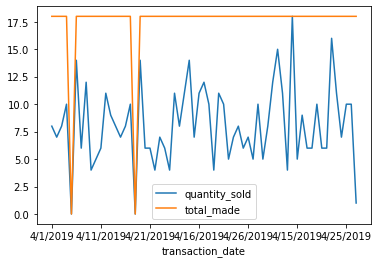

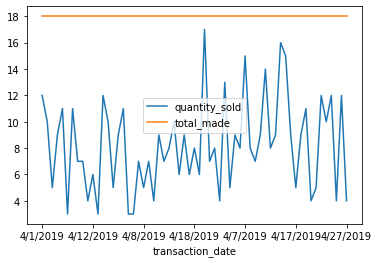

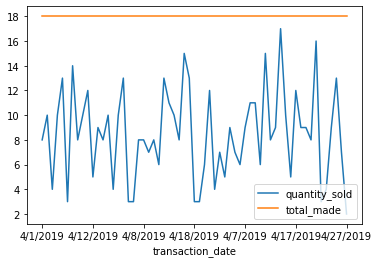

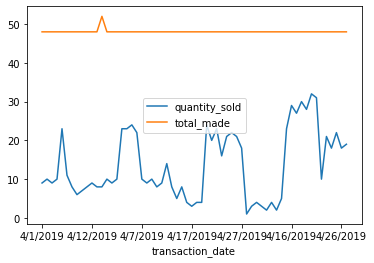

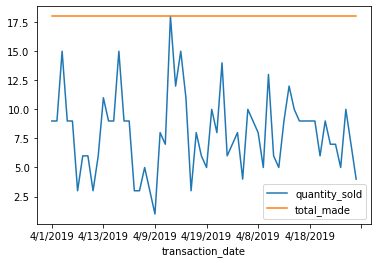

In [69]:
# compares amount sold vs total amount for every product
for i in range(69, 74):
    product = dataset[dataset.product_id == i]
    product.plot(x='transaction_date', y=['quantity_sold', 'total_made'])

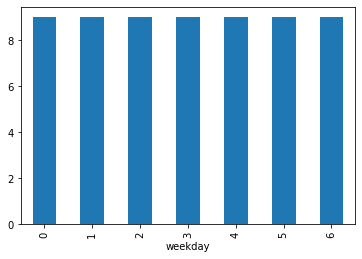

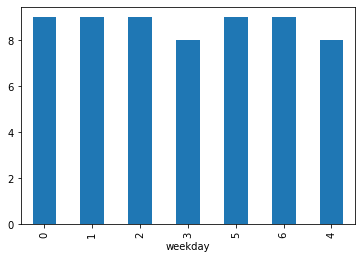

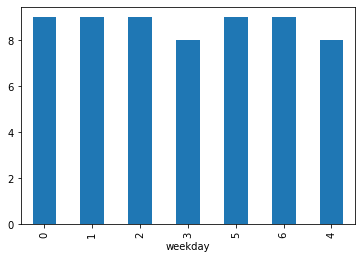

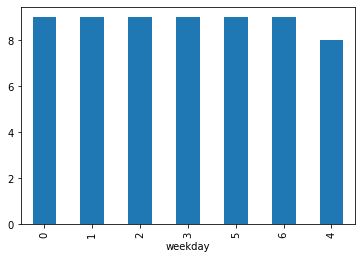

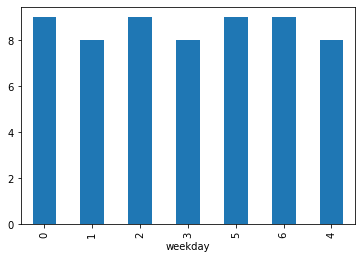

In [70]:
# shows how much a given product is sold according to the weekday
for i in range(69, 74):
    product = dataset[dataset.product_id == i]
    product['quantity_sold'].groupby(product['weekday'], sort=False).count().plot(kind='bar')
    plt.show()

## Feature selection/extraction

In [71]:
x = dataset[['weekday', 'product_id', 'sales_outlet_id']]
x[0:20]

,weekday,product_id,sales_outlet_id
0,0,69,3
1,0,70,3
2,0,71,3
3,0,72,3
4,0,73,3
5,1,69,3
6,1,70,3
7,1,71,3
8,1,72,3
9,1,73,3


In [72]:
y = dataset['quantity_sold']
y[0:20]

0      8
1     12
2      8
3      9
4      9
5      7
6     10
7     10
8     10
9      9
10     8
11     5
12     4
13     9
14    15
15    10
16     9
17    10
18    10
19     9
Name: quantity_sold, dtype: int64

In [73]:
x = preprocessing.StandardScaler().fit(x).transform(x)

## K Nearest Neighbors (KNN)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (214, 3) (214,)
Test set: (93, 3) (93,)


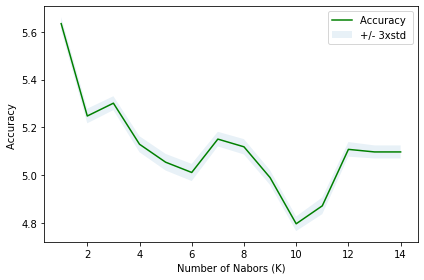

The best accuracy was with 4.795698924731183 with k= 10


In [75]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat1=neigh.predict(X_test)
    mean_acc[n-1] = mean_absolute_error(y_test.values, yhat1)


    std_acc[n-1]=np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.min(), "with k=", mean_acc.argmin()+1)

Wall time: 35 ms


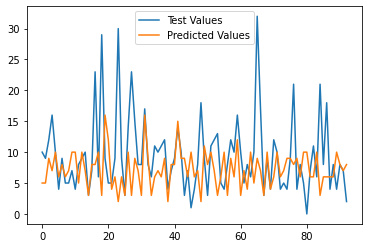

In [76]:
%%time
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
plt.plot(y_test.values)
plt.plot(yhat1)
plt.legend(('Test Values', 'Predicted Values'))

## Support Vector Machine

In [77]:
from sklearn import svm

Wall time: 36 ms


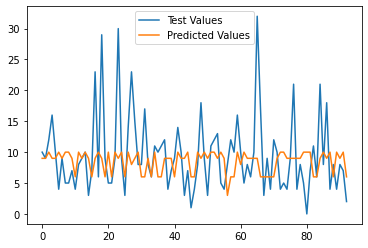

In [78]:
%%time

neigh = svm.SVC(kernel='linear').fit(X_train,y_train)
yhat3=neigh.predict(X_test)
plt.plot(y_test.values)
plt.plot(yhat3)
plt.legend(('Test Values', 'Predicted Values'))

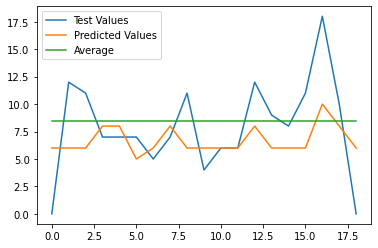

Machine Learning Score: 3.210526315789474
Average Score: 3.289473684210526


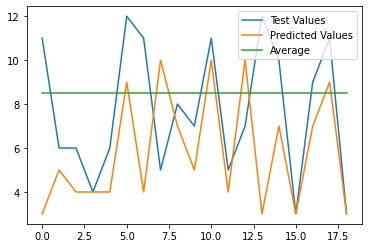

Machine Learning Score: 3.210526315789474
Average Score: 2.763157894736842


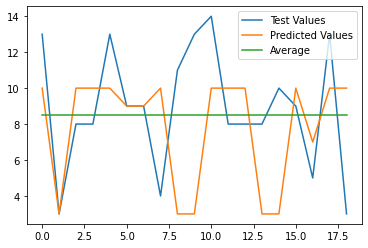

Machine Learning Score: 3.526315789473684
Average Score: 2.6578947368421053


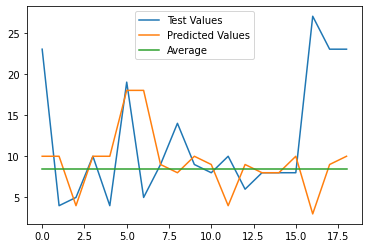

Machine Learning Score: 5.7894736842105265
Average Score: 5.394736842105263


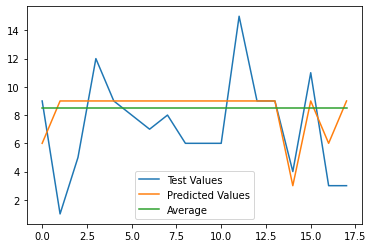

Machine Learning Score: 2.7222222222222223
Average Score: 2.8333333333333335


In [79]:
def knn(product_id, dataset):
    dataset = dataset[dataset.product_id == product_id]
    x = dataset[['weekday', 'product_id', 'sales_outlet_id']]
    y = dataset['quantity_sold']
    X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

    lowest_absolute_error = None
    k = 1
    for n in range(1, 20):
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat1 = neigh.predict(X_test)
        mae = mean_absolute_error(y_test.values, yhat1)
        if (lowest_absolute_error == None or mae < lowest_absolute_error):
            lowest_absolute_error = mae
            k = n

    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat1 = neigh.predict(X_test)
    avr = y_test.replace(y_test.values, 8.5)
    plt.plot(y_test.values)
    plt.plot(yhat1)
    plt.plot(avr.values)
    plt.legend(('Test Values', 'Predicted Values', 'Average'))
    plt.show()

    no_ml = mean_absolute_error(y_test.values, avr.values)
    return mae, no_ml

for i in range(69, 74):
    ml, no_ml = knn(i, dataset)
    print("Machine Learning Score: " + str(ml))
    print("Average Score: " + str(no_ml))
